In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

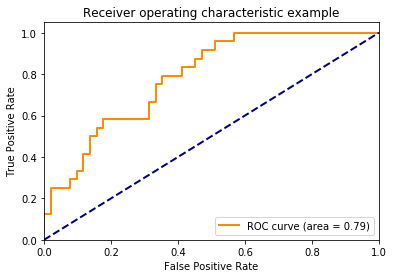

In [3]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [36]:
from utils_processing.utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 4000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


Walking Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.036556,0.208514,0.013916,-0.313109,0.011038,0.000231,0.048828,1511792577945,1511792573982,0
1,-0.520783,0.213194,0.013000,0.055925,0.013849,-0.000087,-0.044678,1511792579927,1511792576142,0
2,0.995854,0.213196,0.024170,-0.020581,0.015962,-0.000256,0.129395,1511792581913,1511792578124,0
3,-0.585793,0.213197,0.008545,0.170060,0.007535,-0.000193,-0.035156,1511792583883,1511792580102,0
4,-0.190467,0.213194,0.019653,-0.677261,0.014081,-0.000197,-0.001953,1511792585868,1511792582082,0


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
770,-0.009983,0.169028,0.018524,-1.272247,0.010811,0.000095,0.045349,1515342449697,1515342445810,0
771,-0.354395,0.179601,0.017181,-0.859266,0.010758,0.000051,-0.040344,1515342451689,1515342447810,0
772,-0.017769,0.176774,0.011093,-0.771254,0.007258,0.000082,-0.001404,1515342453687,1515342449798,0
773,0.069523,0.229413,0.011353,-1.199488,0.006437,0.000206,-0.002747,1515342454085,1515342451892,0
774,0.595170,0.577350,0.000610,-1.500000,0.000527,-0.000014,0.000732,1515342454085,1515342453787,0


Stairs Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.058054,0.277353,0.249268,-1.535585,0.125822,-0.002033,-0.144531,1511794109427,1511794107260,1
1,-0.151656,0.208513,0.105469,-1.211670,0.058574,-0.000976,0.111816,1511794137676,1511794133719,1
2,0.534511,0.213185,0.064880,-0.810616,0.045345,-0.000892,0.221191,1511794139657,1511794135876,1
3,-0.196613,0.267249,0.040527,-1.106622,0.024263,-0.000451,-0.028564,1511794140197,1511794137856,1
4,-0.628156,0.577345,0.007202,-1.500000,0.006294,-0.000122,-0.009521,1511794140197,1511794139837,1


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,0.001324,0.199988,0.056396,-1.182624,0.034936,-0.000909,0.142822,1517762563863,1517762559977,1
741,0.107538,0.213190,0.042786,-1.107888,0.032259,-0.000713,-0.069397,1517762565868,1517762561963,1
742,0.219983,0.213192,0.039963,-0.738128,0.026036,-0.000767,0.052124,1517762567757,1517762563968,1
743,-0.010833,0.242525,0.031555,-0.879498,0.021997,-0.000523,0.007629,1517762569158,1517762566168,1
744,-0.414442,0.377957,0.016846,-1.095433,0.011272,-0.000177,0.003906,1517762569158,1517762567956,1


Stairs Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-1.021262,0.208516,0.037598,0.237436,0.030651,0.000760,-0.211426,1511794298414,1511794294448,2
1,0.652077,0.213192,0.051331,-0.475024,0.029038,0.000753,0.103271,1511794300387,1511794296608,2
2,0.456631,0.267249,0.053101,-0.996965,0.032449,0.000467,0.087402,1511794300931,1511794298587,2
3,-0.544685,0.577343,0.010742,-1.500000,0.009162,0.000138,-0.011230,1511794300931,1511794300568,2
4,0.096934,0.208513,0.116089,-1.513954,0.056793,0.000901,0.145508,1511794326369,1511794322409,2


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
738,0.019617,0.176760,0.073837,-1.001644,0.048400,0.001456,-0.091736,1517762681357,1517762677467,2
739,-0.101159,0.171484,0.084885,-1.291928,0.050027,0.001269,-0.056335,1517762683363,1517762679382,2
740,-1.132433,0.174068,0.035278,-0.176283,0.021962,0.000473,-0.362427,1517762685252,1517762681471,2
741,1.092082,0.182571,0.008972,0.004800,0.011127,0.000167,0.107971,1517762686754,1517762683458,2
742,0.154986,0.267256,0.021561,-1.413095,0.011880,0.000230,0.033691,1517762686754,1517762685367,2


Escalator Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.111658,0.160127,0.044830,-1.694003,0.022932,-0.000751,0.359558,1513098440657,1513098436667,3
1,-0.694840,0.158105,0.049561,-1.024056,0.026298,-0.001122,-0.437561,1513098442659,1513098438681,3
2,-0.429678,0.164381,0.094055,-1.185356,0.059720,-0.001941,-0.778259,1513098444663,1513098440761,3
3,0.373051,0.185678,0.085938,-0.860375,0.054594,-0.001766,0.074341,1513098446648,1513098442755,3
4,0.026722,0.242524,0.042725,-1.192100,0.028435,-0.000657,-0.205994,1513098448438,1513098444751,3


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
754,-0.556474,0.166654,0.069519,-1.150075,0.041812,-0.001040,-0.461914,1517591983695,1517591979821,3
755,0.747235,0.162214,0.062927,-0.628924,0.036944,-0.001189,0.341858,1517591985692,1517591981817,3
756,-0.463315,0.166656,0.039749,-0.532260,0.025756,-0.000752,-0.127197,1517591987664,1517591983793,3
757,-0.197195,0.196105,0.061676,-1.386538,0.037001,-0.000948,-0.214783,1517591989051,1517591985781,3
758,0.548370,0.316223,0.020721,-1.152427,0.013463,-0.000386,0.029541,1517591989051,1517591987762,3


Escalator Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.019180,0.208513,0.056763,-1.590601,0.029714,0.000290,0.100098,1512574184873,1512574180915,4
1,0.110041,0.213192,0.033752,-0.699422,0.021052,0.000555,0.038818,1512574186852,1512574183074,4
2,0.185690,0.213190,0.076416,-1.622025,0.037445,0.000596,0.135010,1512574188831,1512574185053,4
3,0.198471,0.213186,0.048096,-0.763740,0.036341,0.000665,0.234863,1512574190813,1512574187033,4
4,-0.116592,0.213185,0.056274,-0.761194,0.041617,0.000851,-0.035889,1512574192806,1512574189011,4


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.796692,0.188974,0.027695,-0.662534,0.019125,0.000398,-0.143005,1517739881737,1517739878361,4
741,0.391562,0.160122,0.046936,-1.235477,0.028000,0.000834,0.320068,1517739883824,1517739879851,4
742,-0.968870,0.156165,0.024780,0.099513,0.020205,0.000756,-0.278381,1517739885806,1517739881835,4
743,0.684228,0.179602,0.026947,-1.001605,0.016305,0.000325,0.162842,1517739886917,1517739883940,4
744,-0.727842,0.301505,0.012939,-0.697778,0.009941,0.000333,-0.043091,1517739886917,1517739885909,4


Lift Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.140978,0.164402,0.147278,-1.418297,0.086766,-0.002147,-0.705383,1513240689727,1513240685732,5
1,-0.308936,0.188955,0.115707,-1.024341,0.072746,-0.002507,-0.155457,1513240690732,1513240688032,5
2,0.269731,0.199953,0.364441,-1.654229,0.184969,-0.003248,1.790161,1513240693417,1513240689828,5
3,-0.308360,0.213152,0.204407,-1.116626,0.119425,-0.002847,-0.360291,1513240695498,1513240692008,5
4,-0.635302,0.301443,0.183258,-1.088869,0.117063,-0.001302,-0.567871,1513240697293,1513240694396,5


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
245,-0.506969,0.158121,0.223694,-1.195090,0.129249,-0.003839,-1.641785,1517742600492,1517742596505,5
246,-0.170028,0.162172,0.240494,-0.911133,0.161371,-0.005347,-0.199768,1517742602482,1517742598596,5
247,0.279590,0.160094,0.315247,-1.333981,0.162554,-0.004697,0.819214,1517742604473,1517742600590,5
248,0.747088,0.196101,0.095993,-0.872499,0.067266,-0.002173,0.774292,1517742605069,1517742602580,5
249,0.240351,0.408246,0.010162,-1.641280,0.005865,-0.000181,0.006958,1517742605069,1517742604573,5


Lift Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.013894,0.176778,0.167175,-1.234812,0.095970,0.001914,-0.215088,1513693873478,1513693869500,6
1,0.088861,0.188955,0.167618,-1.354644,0.096944,0.001881,0.206726,1513693875468,1513693871700,6
2,0.022904,0.192419,0.145447,-1.125555,0.095383,0.002131,0.126953,1513693877467,1513693873679,6
3,0.042569,0.192417,0.154724,-1.096245,0.100460,0.002023,-0.138062,1513693879351,1513693875575,6
4,-0.255256,0.188950,0.156021,-1.129477,0.090355,0.002188,-0.327637,1513693881456,1513693877558,6


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
230,0.611912,0.156169,0.175171,-0.961909,0.106114,0.003475,1.181885,1517742579704,1517742575711,6
231,0.052867,0.156135,0.237732,-1.110591,0.143881,0.005178,-0.237305,1517742581698,1517742577712,6
232,-0.120854,0.158075,0.263474,-1.357341,0.148015,0.004713,-0.398499,1517742583689,1517742579805,6
233,-0.425482,0.176747,0.139557,-1.076135,0.078653,0.002686,-0.498840,1517742584879,1517742581802,6
234,-0.268848,0.288667,0.024002,-1.276984,0.016339,0.000476,-0.033203,1517742584879,1517742583793,6


In [6]:
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)

In [7]:
def create_vertical_transition_dataset(walking_frame, vertical_frame):
    v_features_array = vertical_frame.as_matrix(columns=vertical_frame.columns)
    w_features_array = walking_frame.as_matrix(columns=walking_frame.columns)
    X = np.concatenate([w_features_array, v_features_array])
    Y = X[:,10]
    X = X[:,:7]
    return X, Y

In [8]:
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)

In [10]:
X.shape, Y

((4252, 7), array([ 0.,  0.,  0., ...,  1.,  1.,  1.]))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=0)

In [12]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr= roc_curve(y_test[:, i], y_score[:, i])
roc_auc[i] = auc(fpr[i], tpr[i])

IndexError: too many indices for array

In [19]:
from sklearn.feature_selection  import SelectKBest

In [22]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [24]:
clf.feature_importances_.argsort()[::-1]

array([4, 2, 1, 5, 3, 6, 0])

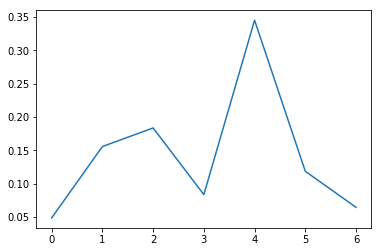

In [27]:
plt.plot(clf.feature_importances_)

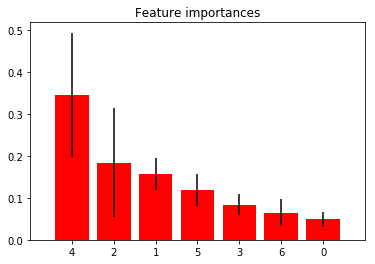

In [35]:
# Plot the feature importances of the forest
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[0]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[0]), indices)
plt.xlim([-1, X.shape[0]])
plt.show()

In [29]:
X.shape

(7,)

In [23]:
SelectKBest.fit(clf, X,Y)

AttributeError: 'RandomForestClassifier' object has no attribute 'score_func'

In [37]:
ypred = clf.predict(X_test)

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred)

0.8559156677498726

In [40]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)

In [46]:
%matplotlib inline 
plt.figure()
lw = 0
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KeyError: 0